In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# EXAMPLE 1

In [2]:
def fxt(x, scale=0.1):
    w = 1.8
    val = 1. * np.sin(w*x) + 2.5 * np.cos(w*x) + np.random.RandomState(12).normal(scale=scale, size=len(x))
    return val


t = np.linspace(0, 15, 150)
x = fxt(t, scale=0.05)
x_ideal = fxt(t, scale=0)

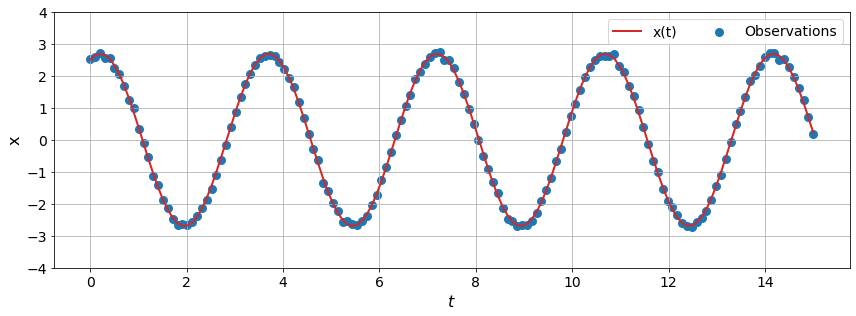

In [3]:
plt.figure(figsize=(12, 4.5))

#plt.plot(X[:, 1], y_ideal, linewidth=2, label=r"$y = 1 + 0.2x_{1}$", color='0')
plt.scatter(t, x, linewidth=3, label="Observations")
plt.plot(t, x_ideal, linewidth=2, label="x(t)", color='C3')


plt.xlabel(r'$t$', size=16)
plt.xticks(size=14)

plt.ylabel(r"x", size=16)
plt.yticks(size=14)

#plt.xlim(-0.5, 10.5)
plt.ylim(-4., 4.)

plt.legend(loc='best', fontsize=14, ncol=2)
plt.grid(b=1)

plt.tight_layout()
plt.savefig(fname="plots/pendulum_example_1_1.pdf", format="pdf")
plt.show()

In [4]:
def f(a, b, w, t):
    val = a * np.sin(w*t) + b * np.cos(w*t)
    return val

def loss(param, x, t):
    val = 1. * ( ( f(param[0], param[1], param[2], t) - x )**2 ).sum() / len(x)
    return val

def grad_a(param, x, t):
    g = 2. / len(x) * ( ( f(param[0], param[1], param[2], t) - x ) * np.sin(param[2]*t) ).sum() 
    return g

def grad_b(param, x, t):
    g = 2. / len(x) * ( ( f(param[0], param[1], param[2], t) - x ) * np.cos(param[2]*t) ).sum() 
    return g

def grad_w(param, x, t):
    g = 2. / len(x) * ( ( f(param[0], param[1], param[2], t) - x ) * \
                       (param[0] * t * np.cos(param[2]*t) - param[1] * t * np.sin(param[2]*t)) ).sum() 
    return g

def grad(param, x, t):
    g = np.array([grad_a(param, x, t), grad_b(param, x, t), grad_w(param, x, t)])
    return g

In [5]:
alpha = 0.005
gamma = 0.9
n_iters = 251

beta_0 = np.array([2., 2., 2.])
loss_0 = loss(beta_0, x, t)
v = 0
beta_curr = beta_0
loss_curr = loss_0

beta_iters = [beta_0]
loss_iters = [loss_0]
for i in range(1, n_iters):
    print('Iteration: ', i)
    print ('Current beta: ', beta_curr)
    print ('Current loss: ', loss_curr)
    g = grad(beta_curr, x, t)
    #g = np.round(g, 4)
    print('Gradient: ', g)
    v = gamma * v + alpha * g
    beta_new = beta_curr - v
    #beta_new = np.round(beta_new, 4)
    loss_new = loss(beta_new, x, t)
    beta_iters.append(beta_new)
    loss_iters.append(loss_new)
    print('New beta: ', beta_new, '\n')
    print('New loss: ', loss_new, '\n')
    beta_curr = beta_new
    loss_curr = loss_new
beta_iters = np.array(beta_iters)
loss_iters = np.array(loss_iters)

Iteration:  1
Current beta:  [2. 2. 2.]
Current loss:  5.4652862896968095
Gradient:  [ 0.38250216  2.56958024 41.37875076]
New beta:  [1.99808749 1.9871521  1.79310625] 

New loss:  0.7717828656848352 

Iteration:  2
Current beta:  [1.99808749 1.9871521  1.79310625]
Current loss:  0.7717828656848352
Gradient:  [  1.10951972  -0.51546508 -25.36602413]
New beta:  [1.99081863 1.97816631 1.73373199] 

New loss:  2.952561603240333 

Iteration:  3
Current beta:  [1.99081863 1.97816631 1.73373199]
Current loss:  2.952561603240333
Gradient:  [  2.20672416  -0.54956307 -45.98705137]
New beta:  [1.97324304 1.97282692 1.91023041] 

New loss:  1.5190072441945364 

Iteration:  4
Current beta:  [1.97324304 1.97282692 1.91023041]
Current loss:  1.5190072441945364
Gradient:  [-0.30931698  1.19868566 36.39044889]
New beta:  [1.95897159 1.96202804 1.88712675] 

New loss:  0.782892371012086 

Iteration:  5
Current beta:  [1.95897159 1.96202804 1.88712675]
Current loss:  0.782892371012086
Gradient:  [-0.2

New beta:  [1.33543789 2.34077904 1.81466343] 

New loss:  0.0179241355994743 

Iteration:  92
Current beta:  [1.33543789 2.34077904 1.81466343]
Current loss:  0.0179241355994743
Gradient:  [ 0.05232274 -0.02328427  0.7051653 ]
New beta:  [1.33160509 2.34339036 1.81303954] 

New loss:  0.017107884711690113 

Iteration:  93
Current beta:  [1.33160509 2.34339036 1.81303954]
Current loss:  0.017107884711690113
Gradient:  [ 0.07780919 -0.03630692 -0.10250139]
New beta:  [1.32776653 2.34592209 1.81209055] 

New loss:  0.01698600937246248 

Iteration:  94
Current beta:  [1.32776653 2.34592209 1.81209055]
Current loss:  0.01698600937246248
Gradient:  [ 0.09120753 -0.04272794 -0.53506072]
New beta:  [1.32385578 2.34841428 1.81391177] 

New loss:  0.016649787757720816 

Iteration:  95
Current beta:  [1.32385578 2.34841428 1.81391177]
Current loss:  0.016649787757720816
Gradient:  [ 0.0543098  -0.02328122  0.56946153]
New beta:  [1.32006456 2.35077366 1.81270355] 

New loss:  0.01600631351619556

Gradient:  [ 0.03701934 -0.01824074  0.04862097]
New beta:  [1.18154531 2.41892829 1.80704568] 

New loss:  0.006642468007980254 

Iteration:  142
Current beta:  [1.18154531 2.41892829 1.80704568]
Current loss:  0.006642468007980254
Gradient:  [ 0.03793479 -0.01864355  0.00592895]
New beta:  [1.17937108 2.41997358 1.80686521] 

New loss:  0.006542423666463433 

Iteration:  143
Current beta:  [1.17937108 2.41997358 1.80686521]
Current loss:  0.006542423666463433
Gradient:  [ 0.0391232  -0.01915844 -0.04453396]
New beta:  [1.17721866 2.42101014 1.80692547] 

New loss:  0.006442413126826191 

Iteration:  144
Current beta:  [1.17721866 2.42101014 1.80692547]
Current loss:  0.006442413126826191
Gradient:  [ 0.03585252 -0.01769987  0.03730079]
New beta:  [1.17510222 2.42203154 1.80679319] 

New loss:  0.006344743589683896 

Iteration:  145
Current beta:  [1.17510222 2.42203154 1.80679319]
Current loss:  0.006344743589683896
Gradient:  [ 0.03620298 -0.01783763  0.01214077]
New beta:  [1.17301

New loss:  0.0033731546688431724 

Iteration:  213
Current beta:  [1.08118561 2.46676216 1.80293617]
Current loss:  0.0033731546688431724
Gradient:  [ 0.01491191 -0.00657075  0.00031157]
New beta:  [1.0803388  2.46714102 1.80290082] 

New loss:  0.003358128493706315 

Iteration:  214
Current beta:  [1.0803388  2.46714102 1.80290082]
Current loss:  0.003358128493706315
Gradient:  [ 0.01473551 -0.00648491 -0.00030597]
New beta:  [1.07950299 2.46751443 1.80287054] 

New loss:  0.003343502405130179 

Iteration:  215
Current beta:  [1.07950299 2.46751443 1.80287054]
Current loss:  0.003343502405130179
Gradient:  [ 0.01447442 -0.00636621  0.00161391]
New beta:  [1.07867839 2.46788232 1.80283522] 

New loss:  0.0033292649887442286 

Iteration:  216
Current beta:  [1.07867839 2.46788232 1.80283522]
Current loss:  0.0033292649887442286
Gradient:  [ 0.01431988 -0.00628995  0.00050707]
New beta:  [1.07786465 2.46824488 1.80280089] 

New loss:  0.0033154086865226735 

Iteration:  217
Current beta:

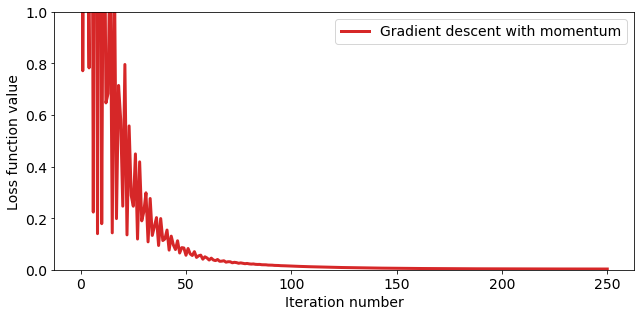

In [6]:
plt.figure(figsize=(9, 4.5))

plt.plot(loss_iters, linewidth=3, label="Gradient descent with momentum", color='C3')

plt.xlabel(r'Iteration number', size=14)
plt.xticks(size=14)

plt.ylabel(r"Loss function value", size=14)
plt.yticks(size=14)

#plt.xlim(-0.1, 100)
plt.ylim(-0.0, 1.)


plt.legend(loc='best', fontsize=14, ncol=2)

plt.tight_layout()
plt.savefig(fname="plots/pendulum_example_1_2.pdf", format="pdf")
plt.show()

In [7]:
i = -1
x_hat = f(beta_iters[i][0], beta_iters[i][1], beta_iters[i][2], t)

In [8]:
beta_iters[-1]

array([1.05576775, 2.47792162, 1.80191177])

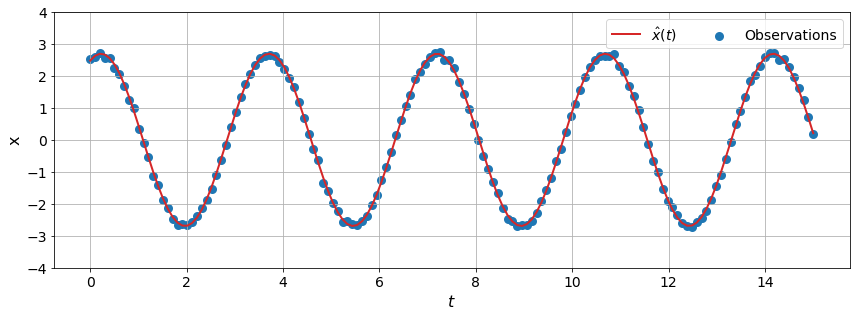

In [9]:
plt.figure(figsize=(12, 4.5))

#plt.plot(X[:, 1], y_ideal, linewidth=2, label=r"$y = 1 + 0.2x_{1}$", color='0')
plt.scatter(t, x, linewidth=3, label="Observations")
#plt.plot(t, x_ideal, linewidth=2, label="x(t)", color='0')
plt.plot(t, x_hat, linewidth=2, label=r"$\hat{x}(t)$", color='C3')


plt.xlabel(r'$t$', size=16)
plt.xticks(size=14)

plt.ylabel(r"x", size=16)
plt.yticks(size=14)

#plt.xlim(-0.5, 10.5)
plt.ylim(-4., 4.)

plt.legend(loc='best', fontsize=14, ncol=2)
plt.grid(b=1)

plt.tight_layout()
plt.savefig(fname="plots/pendulum_example_1_3.pdf", format="pdf")
plt.show()

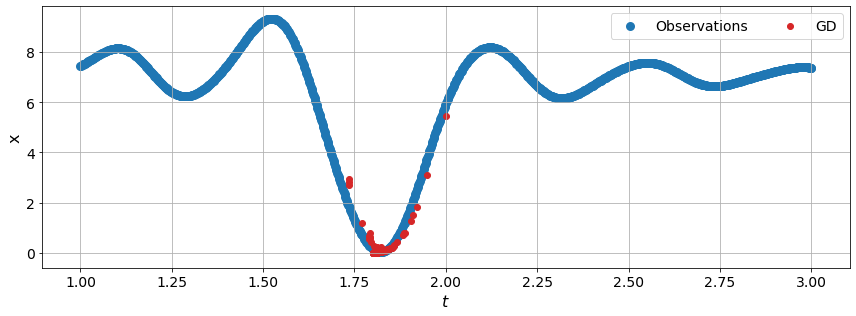

In [10]:
omegas = np.linspace(1, 3, 1000)
ls = []
for w in omegas:
    l = loss([1.5, 2.2, w], x, t)
    ls.append(l)
    
plt.figure(figsize=(12, 4.5))

plt.scatter(omegas, ls, linewidth=3, label="Observations")
plt.scatter(beta_iters[:, 2], loss_iters, label="GD", color='C3')


plt.xlabel(r'$t$', size=16)
plt.xticks(size=14)

plt.ylabel(r"x", size=16)
plt.yticks(size=14)

#plt.xlim(-0.5, 10.5)
#plt.ylim(-4., 4.)

plt.legend(loc='best', fontsize=14, ncol=2)
plt.grid(b=1)

plt.tight_layout()
plt.show()